In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df_revenue = pd.read_excel('ciro.xlsx')

In [3]:
euro_revenue = df_revenue['EUR_Revenue']

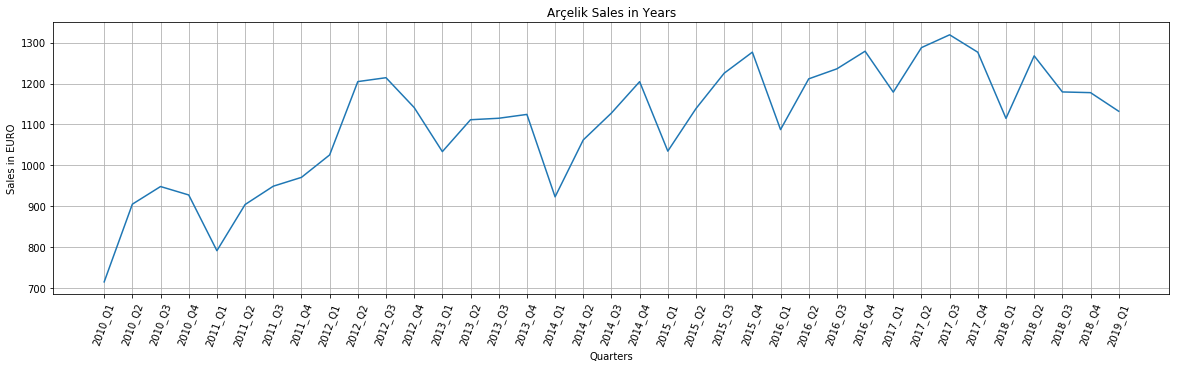

In [4]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_revenue['Date'], df_revenue['EUR_Revenue'])

ax.set(xlabel='Quarters', ylabel='Sales in EURO',
       title='Arçelik Sales in Years')
plt.xticks(rotation=70)
ax.grid()
#fig.savefig("test.png")
fig.show()

In [5]:
X = euro_revenue[8:37].reset_index(drop=True).values.tolist()

In [6]:
X = euro_revenue.reset_index(drop=True).values

In [7]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = [0,1,2]
q_values = [0,1,2]
warnings.filterwarnings("ignore")
evaluate_models(X, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=23162.503
ARIMA(0, 0, 1) MSE=15930.104
ARIMA(0, 0, 2) MSE=10354.604
ARIMA(0, 1, 0) MSE=9906.431
ARIMA(0, 1, 1) MSE=8444.090
ARIMA(0, 1, 2) MSE=10759.856
ARIMA(0, 2, 0) MSE=30614.792
ARIMA(0, 2, 1) MSE=9968.204
ARIMA(0, 2, 2) MSE=6295.125
ARIMA(1, 0, 0) MSE=8922.576
ARIMA(1, 0, 1) MSE=21065.811
ARIMA(1, 0, 2) MSE=9943.785
ARIMA(1, 1, 0) MSE=8485.079
ARIMA(1, 1, 1) MSE=9784.428
ARIMA(1, 2, 0) MSE=17190.415
ARIMA(1, 2, 1) MSE=8342.892
ARIMA(2, 0, 0) MSE=8348.387
ARIMA(2, 1, 0) MSE=8623.104
ARIMA(2, 2, 0) MSE=15155.162
ARIMA(2, 2, 1) MSE=7847.592
ARIMA(4, 0, 0) MSE=6598.827
ARIMA(4, 1, 0) MSE=5746.521
ARIMA(4, 2, 0) MSE=6665.678
ARIMA(4, 2, 1) MSE=5649.447
ARIMA(6, 1, 0) MSE=5517.897
ARIMA(6, 2, 0) MSE=7216.659
ARIMA(6, 2, 1) MSE=4911.770
ARIMA(10, 1, 0) MSE=6261.579
Best ARIMA(6, 2, 1) MSE=4911.770


predicted=1135.089216, expected=1211.400000
predicted=1287.137399, expected=1235.900000
predicted=1321.237911, expected=1278.900000
predicted=1133.138438, expected=1178.900000
predicted=1262.805861, expected=1287.700000
predicted=1309.160861, expected=1319.000000
predicted=1366.501561, expected=1276.400000
predicted=1204.456552, expected=1114.800000
predicted=1213.227007, expected=1267.600000
predicted=1325.816368, expected=1179.400000
predicted=1197.697979, expected=1177.700000
predicted=1066.588500, expected=1132.200000
Test MSE: 4858.942


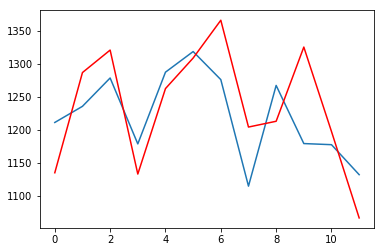

In [9]:
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [10]:
X = euro_revenue[8:37].reset_index(drop=True).values.tolist()

In [11]:
preds = []
for i in range(3):
    model = ARIMA(X,order=(4,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    preds.append(yhat)
    X.append(yhat[0])
    

In [12]:
model = ARIMA(X, order=(4,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]

In [13]:
yhat[0]

1149.2093058631185

In [14]:
X

[1025.5,
 1204.7,
 1214.2,
 1141.3,
 1033.6,
 1111.5,
 1115.1,
 1124.5,
 923.1,
 1062.2,
 1127.9,
 1204.5,
 1034.8,
 1138.8,
 1225.2,
 1276.6,
 1087.4,
 1211.4,
 1235.9,
 1278.9,
 1178.9,
 1287.7,
 1319.0,
 1276.4,
 1114.8,
 1267.6,
 1179.4,
 1177.7,
 1132.2,
 1261.1934562020465,
 1185.1478426424267,
 1186.6936940836677]